In [1]:
import os
import shutil
import numpy as np
import efficientnet.keras as efn

from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers.legacy import RMSprop
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Define the augmentation configuration for training
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of the data for validation
)

# Directory containing the dataset
dataset_dir = 'dataset/'

# Create generators for training and validation
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),  # Resize images to a fixed size
    batch_size=32,
    class_mode='binary',  # Use 'categorical' if you have more than 2 classes
    subset='training'  # Use the training subset
)
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),  # Resize images to a fixed size
    batch_size=32,
    class_mode='binary',  # Use 'categorical' if you have more than 2 classes
    subset='validation'  # Use the validation subset
)

Found 170 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


In [3]:
base_model = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
predictions = Dense(1, activation="sigmoid")(x)
model_final = Model(inputs = base_model.input, outputs = predictions)

In [4]:
model_final.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 112, 112, 32)         128       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  (None, 112, 112, 32)         0         ['stem_bn[0][0]']         

                                                                                                  
 block2b_expand_activation   (None, 56, 56, 144)          0         ['block2b_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block2b_dwconv (DepthwiseC  (None, 56, 56, 144)          1296      ['block2b_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block2b_bn (BatchNormaliza  (None, 56, 56, 144)          576       ['block2b_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block2b_a

                                                                                                  
 block3b_dwconv (DepthwiseC  (None, 28, 28, 240)          6000      ['block3b_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block3b_bn (BatchNormaliza  (None, 28, 28, 240)          960       ['block3b_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block3b_activation (Activa  (None, 28, 28, 240)          0         ['block3b_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block3b_s

                                                                                                  
 block4b_bn (BatchNormaliza  (None, 14, 14, 480)          1920      ['block4b_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block4b_activation (Activa  (None, 14, 14, 480)          0         ['block4b_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block4b_se_squeeze (Global  (None, 480)                  0         ['block4b_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block4b_s

                                                                                                  
 block5a_dwconv (DepthwiseC  (None, 14, 14, 480)          12000     ['block5a_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5a_bn (BatchNormaliza  (None, 14, 14, 480)          1920      ['block5a_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block5a_activation (Activa  (None, 14, 14, 480)          0         ['block5a_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block5a_s

                                                                                                  
 block5c_bn (BatchNormaliza  (None, 14, 14, 672)          2688      ['block5c_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block5c_activation (Activa  (None, 14, 14, 672)          0         ['block5c_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block5c_se_squeeze (Global  (None, 672)                  0         ['block5c_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block5c_s

                                                                                                  
 block6b_activation (Activa  (None, 7, 7, 1152)           0         ['block6b_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block6b_se_squeeze (Global  (None, 1152)                 0         ['block6b_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block6b_se_reshape (Reshap  (None, 1, 1, 1152)           0         ['block6b_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block6b_s

                                                                                                  
 block6d_bn (BatchNormaliza  (None, 7, 7, 1152)           4608      ['block6d_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block6d_activation (Activa  (None, 7, 7, 1152)           0         ['block6d_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block6d_se_squeeze (Global  (None, 1152)                 0         ['block6d_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block6d_s

                                                                                                  
 dense_1 (Dense)             (None, 1)                    1025      ['dropout[0][0]']             
                                                                                                  
Total params: 68276893 (260.46 MB)
Trainable params: 64227329 (245.01 MB)
Non-trainable params: 4049564 (15.45 MB)
__________________________________________________________________________________________________


In [5]:
model_final.compile(optimizer=RMSprop(learning_rate=0.0001, decay=1e-6), loss='binary_crossentropy', metrics=['accuracy'])
# Train the model using fit instead of fit_generator
eff_history = model_final.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20
)

Epoch 1/20
6/6 [==============================] - 43s 5s/step - loss: 2.0895 - accuracy: 0.7176 - val_loss: 2.6080 - val_accuracy: 0.4146
Epoch 2/20
6/6 [==============================] - 25s 4s/step - loss: 1.3160 - accuracy: 0.7412 - val_loss: 0.6054 - val_accuracy: 0.7561
Epoch 3/20
6/6 [==============================] - 25s 4s/step - loss: 0.2616 - accuracy: 0.9176 - val_loss: 0.8412 - val_accuracy: 0.7805
Epoch 4/20
6/6 [==============================] - 25s 4s/step - loss: 0.0770 - accuracy: 0.9647 - val_loss: 0.5711 - val_accuracy: 0.8049
Epoch 5/20
6/6 [==============================] - 25s 4s/step - loss: 0.1385 - accuracy: 0.9529 - val_loss: 1.4962 - val_accuracy: 0.7805
Epoch 6/20
6/6 [==============================] - 25s 5s/step - loss: 0.1170 - accuracy: 0.9588 - val_loss: 0.5377 - val_accuracy: 0.8049
Epoch 7/20
6/6 [==============================] - 26s 4s/step - loss: 0.2866 - accuracy: 0.9235 - val_loss: 2.2548 - val_accuracy: 0.4146
Epoch 8/20
6/6 [==================

In [6]:
# Save the entire model to a HDF5 file
model_final.save('keras_model.h5')


C:\Users\Talha\anaconda3\envs\elegant\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
from tensorflow.keras.models import load_model

# Load the model
model_final_loaded = load_model('keras_model.h5')

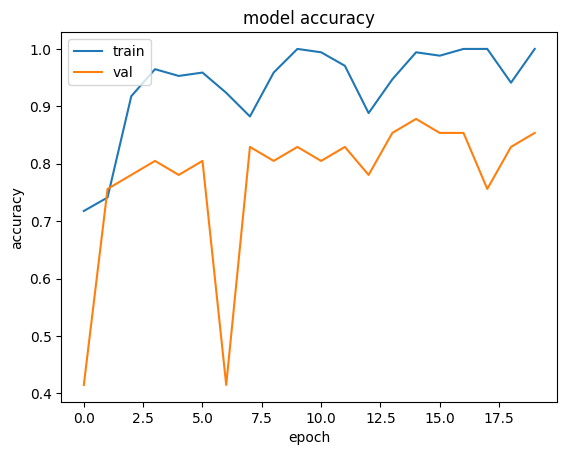

In [7]:
from matplotlib import pyplot as plt
plt.plot(eff_history.history['accuracy'])
plt.plot(eff_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Evaluation

In [8]:
evaluation_score = model_final.evaluate(validation_generator)

# Print the evaluation results
print(f'Validation Loss: {evaluation_score[0]}')
print(f'Validation Accuracy: {evaluation_score[1]}')

2/2 [==============================] - 4s 1s/step - loss: 0.8029 - accuracy: 0.8293
Validation Loss: 0.8029004335403442
Validation Accuracy: 0.8292682766914368


# Inference

In [9]:
# Function to preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)  # Load image with target size
    img_array = image.img_to_array(img)  # Convert image to numpy array
    a = img_array / 255.0
    plt.imshow(a)
    plt.show()
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input
    img_array /= 255.0  # Rescale image
    return img_array

# Function to run inference
def run_inference(model, img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)  # Run model prediction
    return prediction, img_array


In [10]:
# Define the main folder and subfolders
main_folder = 'testing'
subfolders = ['lagophthalmos', 'normal']
files = []
# Loop through each subfolder
for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder, subfolder)
    
    # Check if the subfolder exists
    if os.path.exists(subfolder_path) and os.path.isdir(subfolder_path):
        
        # Loop through each file in the subfolder
        for file_name in os.listdir(subfolder_path):
            source = os.path.join(subfolder_path, file_name)
            files.append(source)
    else:
        print(f"Subfolder {subfolder} does not exist or is not a directory.")

print("Merging complete.")
files

Merging complete.


['testing\\lagophthalmos\\IMG_1831.JPG',
 'testing\\lagophthalmos\\IMG_1832.JPG',
 'testing\\lagophthalmos\\IMG_1835.JPG',
 'testing\\lagophthalmos\\IMG_2095.JPG',
 'testing\\lagophthalmos\\IMG_2099.JPG',
 'testing\\lagophthalmos\\IMG_2101.JPG',
 'testing\\lagophthalmos\\IMG_3088.jpg',
 'testing\\lagophthalmos\\IMG_3102.jpeg',
 'testing\\lagophthalmos\\IMG_4593.jpg',
 'testing\\lagophthalmos\\IMG_4621.jpg',
 'testing\\lagophthalmos\\IMG_4627.jpg',
 'testing\\lagophthalmos\\IMG_4628.jpg',
 'testing\\lagophthalmos\\IMG_4629.jpg',
 'testing\\lagophthalmos\\IMG_4630.jpg',
 'testing\\lagophthalmos\\IMG_4631.jpg',
 'testing\\lagophthalmos\\IMG_4633.jpg',
 'testing\\lagophthalmos\\IMG_4920.jpeg',
 'testing\\lagophthalmos\\IMG_5236.jpeg',
 'testing\\lagophthalmos\\test1.jpeg',
 'testing\\lagophthalmos\\test2.jpeg',
 'testing\\normal\\Ali_closed_1.jpg',
 'testing\\normal\\Ali_closed_2.jpg',
 'testing\\normal\\IMG_3088.jpg',
 'testing\\normal\\IMG_4583.png',
 'testing\\normal\\IMG_4593.jpg',
 't

In [11]:
len(files)

33

Image Path testing\lagophthalmos\IMG_1831.JPG


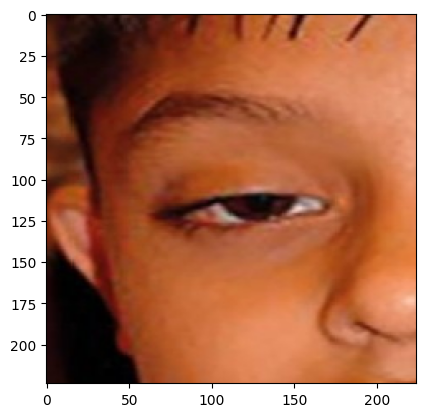

1/1 [==============================] - 3s 3s/step
0
Predicted Class: Lagophthalmos
Prediction Confidence: 5.4609059588983655e-05
Image Path testing\lagophthalmos\IMG_1832.JPG


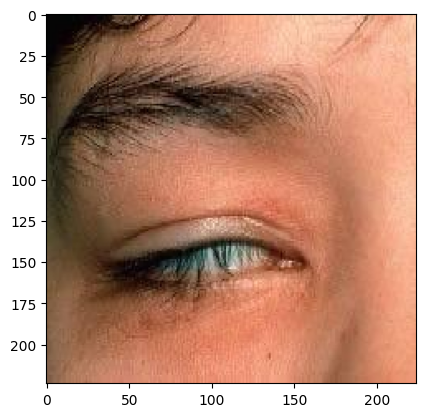

1/1 [==============================] - 0s 254ms/step
1
Predicted Class: Lagophthalmos
Prediction Confidence: 1.1642301842584857e-06
Image Path testing\lagophthalmos\IMG_1835.JPG


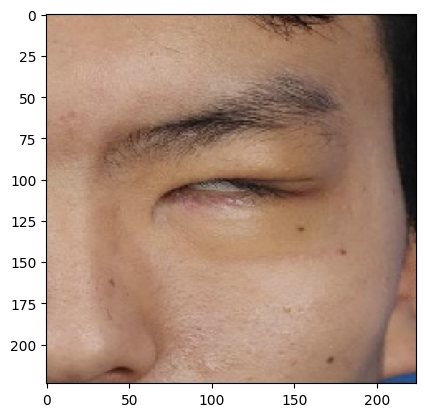

1/1 [==============================] - 0s 221ms/step
2
Predicted Class: Lagophthalmos
Prediction Confidence: 0.00016831024549901485
Image Path testing\lagophthalmos\IMG_2095.JPG


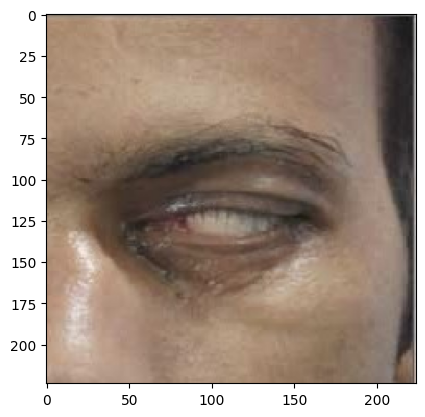

1/1 [==============================] - 0s 233ms/step
3
Predicted Class: Lagophthalmos
Prediction Confidence: 3.169872798025608e-05
Image Path testing\lagophthalmos\IMG_2099.JPG


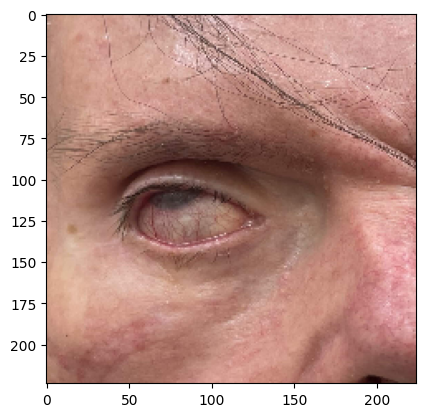

1/1 [==============================] - 0s 217ms/step
4
Predicted Class: Lagophthalmos
Prediction Confidence: 0.0001012039283523336
Image Path testing\lagophthalmos\IMG_2101.JPG


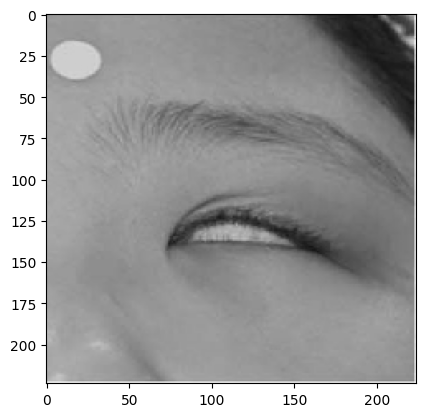

1/1 [==============================] - 0s 225ms/step
5
Predicted Class: Lagophthalmos
Prediction Confidence: 2.049015179750313e-08
Image Path testing\lagophthalmos\IMG_3088.jpg


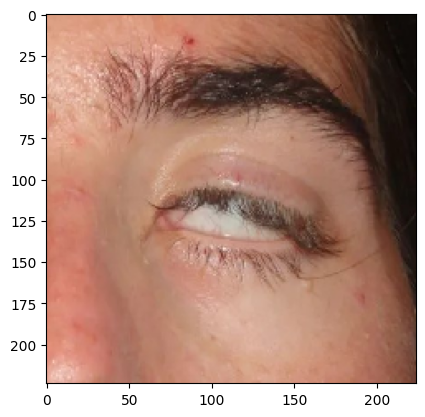

1/1 [==============================] - 0s 232ms/step
6
Predicted Class: Lagophthalmos
Prediction Confidence: 6.14224626716009e-09
Image Path testing\lagophthalmos\IMG_3102.jpeg


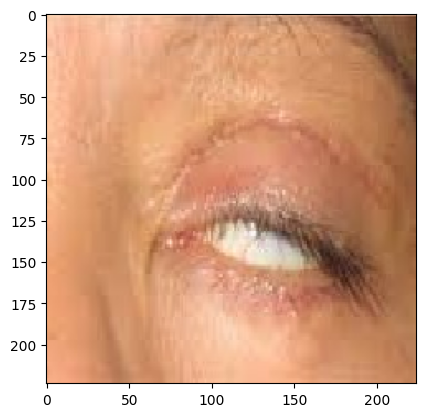

1/1 [==============================] - 0s 266ms/step
7
Predicted Class: Lagophthalmos
Prediction Confidence: 1.5184954405000894e-09
Image Path testing\lagophthalmos\IMG_4593.jpg


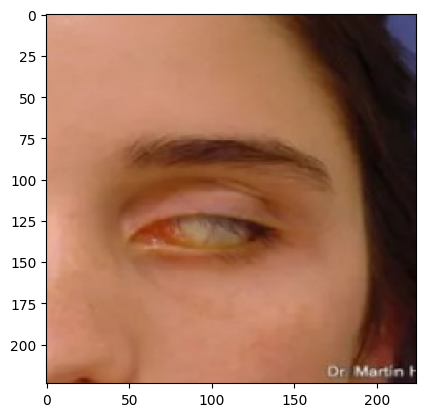

1/1 [==============================] - 0s 260ms/step
8
Predicted Class: Lagophthalmos
Prediction Confidence: 0.00021881463180761784
Image Path testing\lagophthalmos\IMG_4621.jpg


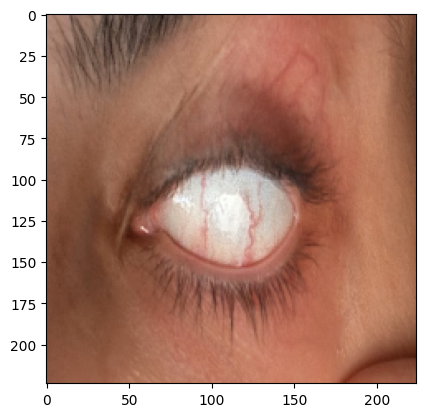

1/1 [==============================] - 0s 249ms/step
9
Predicted Class: Lagophthalmos
Prediction Confidence: 3.882528076815106e-09
Image Path testing\lagophthalmos\IMG_4627.jpg


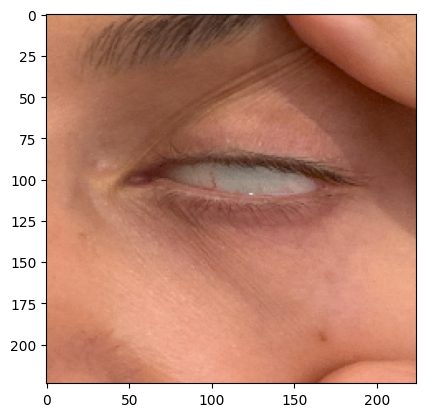

1/1 [==============================] - 0s 250ms/step
10
Predicted Class: Lagophthalmos
Prediction Confidence: 0.0002866203722078353
Image Path testing\lagophthalmos\IMG_4628.jpg


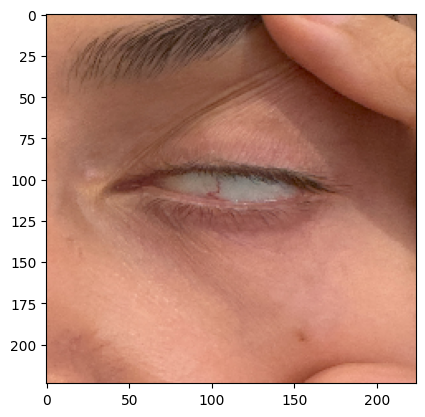

1/1 [==============================] - 0s 301ms/step
11
Predicted Class: Lagophthalmos
Prediction Confidence: 0.0004283701127860695
Image Path testing\lagophthalmos\IMG_4629.jpg


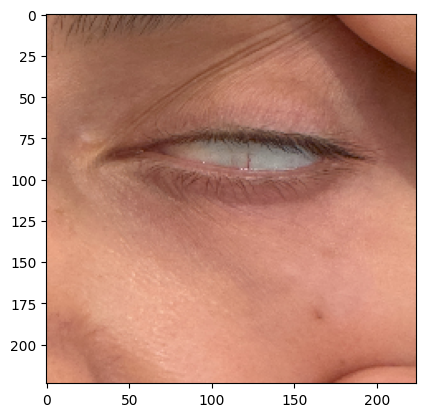

1/1 [==============================] - 0s 270ms/step
12
Predicted Class: Lagophthalmos
Prediction Confidence: 1.8387852833257057e-05
Image Path testing\lagophthalmos\IMG_4630.jpg


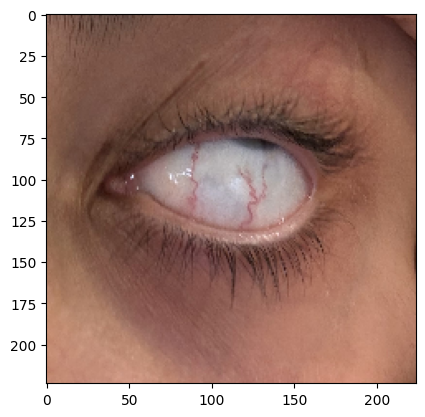

1/1 [==============================] - 0s 252ms/step
13
Predicted Class: Lagophthalmos
Prediction Confidence: 1.0777329407574143e-05
Image Path testing\lagophthalmos\IMG_4631.jpg


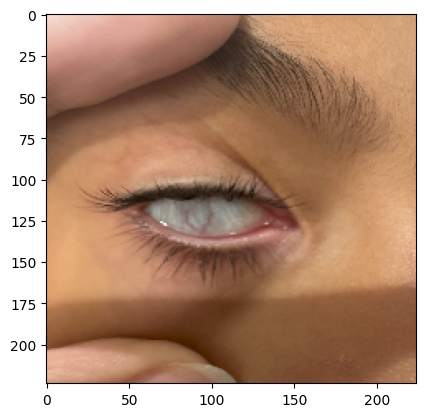

1/1 [==============================] - 0s 185ms/step
14
Predicted Class: Lagophthalmos
Prediction Confidence: 0.0006874743266962469
Image Path testing\lagophthalmos\IMG_4633.jpg


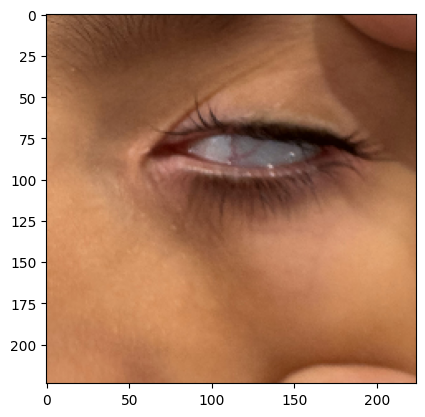

1/1 [==============================] - 0s 142ms/step
15
Predicted Class: Lagophthalmos
Prediction Confidence: 5.65008747344109e-07
Image Path testing\lagophthalmos\IMG_4920.jpeg


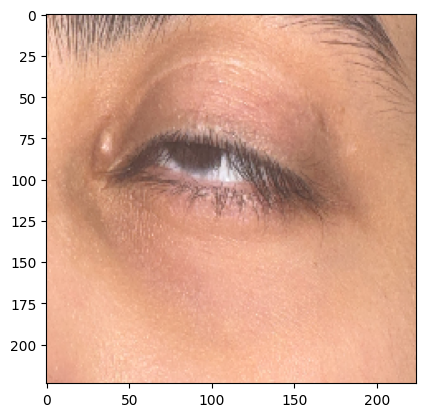

1/1 [==============================] - 0s 265ms/step
16
Predicted Class: Lagophthalmos
Prediction Confidence: 5.52184631352759e-10
Image Path testing\lagophthalmos\IMG_5236.jpeg


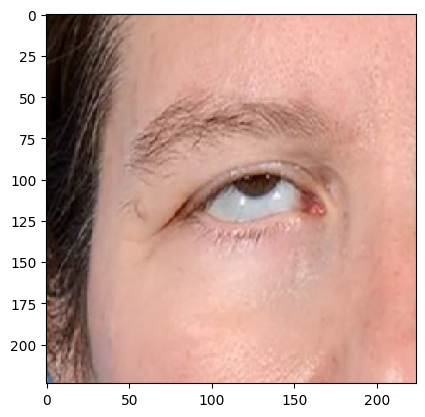

1/1 [==============================] - 0s 292ms/step
17
Predicted Class: Lagophthalmos
Prediction Confidence: 1.1480894954729592e-06
Image Path testing\lagophthalmos\test1.jpeg


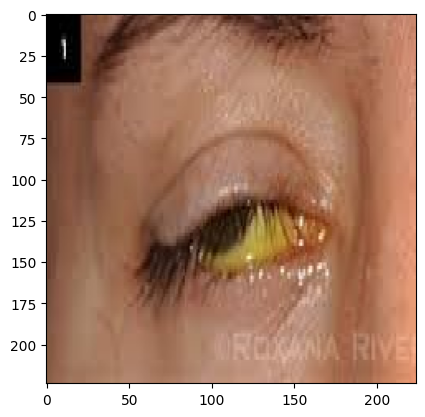

1/1 [==============================] - 0s 299ms/step
18
Predicted Class: Lagophthalmos
Prediction Confidence: 4.735271619260573e-10
Image Path testing\lagophthalmos\test2.jpeg


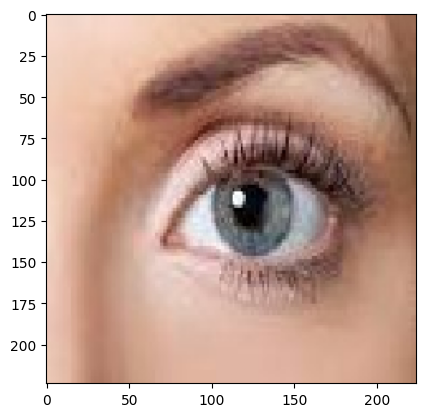

1/1 [==============================] - 0s 234ms/step
19
Predicted Class: Lagophthalmos
Prediction Confidence: 3.7936755469925954e-16
Image Path testing\normal\Ali_closed_1.jpg


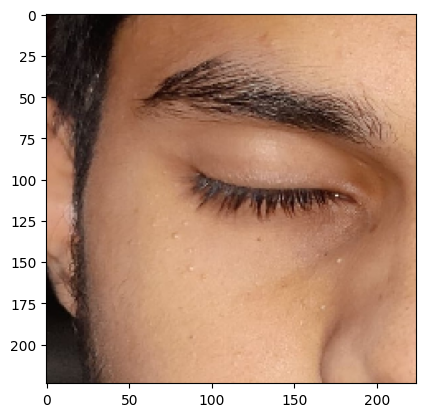

1/1 [==============================] - 0s 267ms/step
20
Predicted Class: Normal
Prediction Confidence: 0.8261892795562744
Image Path testing\normal\Ali_closed_2.jpg


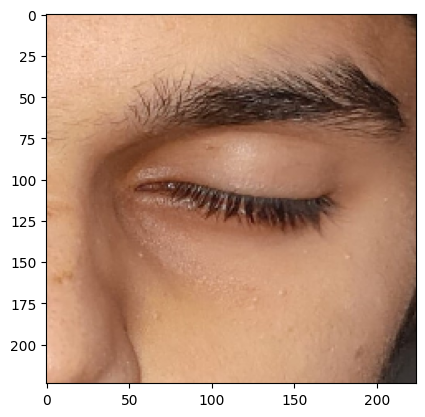

1/1 [==============================] - 0s 217ms/step
21
Predicted Class: Normal
Prediction Confidence: 0.599519670009613
Image Path testing\normal\IMG_3088.jpg


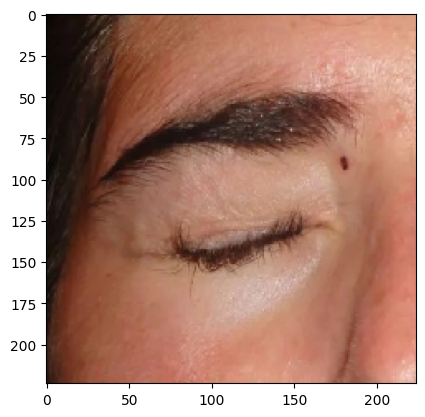

1/1 [==============================] - 0s 248ms/step
22
Predicted Class: Lagophthalmos
Prediction Confidence: 0.04628252610564232
Image Path testing\normal\IMG_4583.png


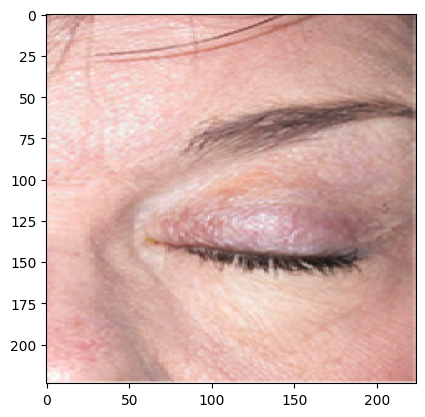

1/1 [==============================] - 0s 248ms/step
23
Predicted Class: Normal
Prediction Confidence: 1.0
Image Path testing\normal\IMG_4593.jpg


1/1 [==============================] - 0s 209ms/step
24
Predicted Class: Normal
Prediction Confidence: 0.9173259139060974
Image Path testing\normal\IMG_4993.jpg


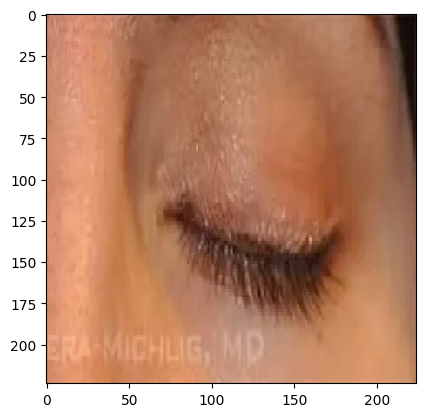

1/1 [==============================] - 0s 158ms/step
25
Predicted Class: Normal
Prediction Confidence: 0.9999932050704956
Image Path testing\normal\IMG_5170.jpg


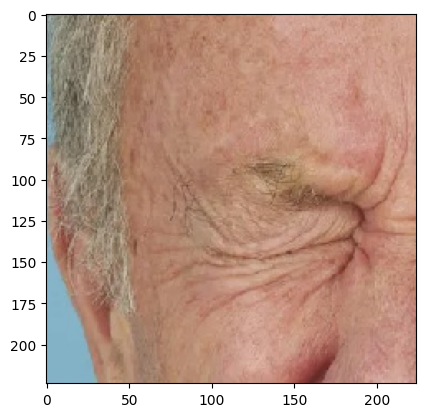

1/1 [==============================] - 0s 195ms/step
26
Predicted Class: Normal
Prediction Confidence: 0.9999163746833801
Image Path testing\normal\IMG_5213.PNG


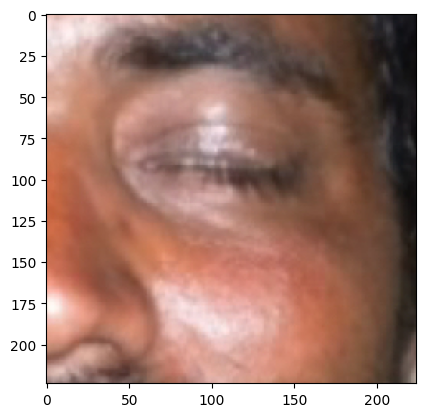

1/1 [==============================] - 0s 287ms/step
27
Predicted Class: Lagophthalmos
Prediction Confidence: 2.823698378051631e-05
Image Path testing\normal\IMG_5214.PNG


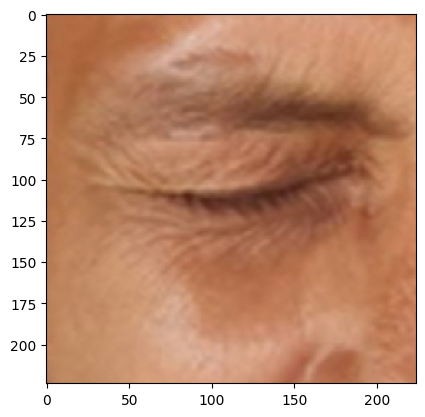

1/1 [==============================] - 0s 222ms/step
28
Predicted Class: Lagophthalmos
Prediction Confidence: 0.020683715119957924
Image Path testing\normal\IMG_5217.PNG


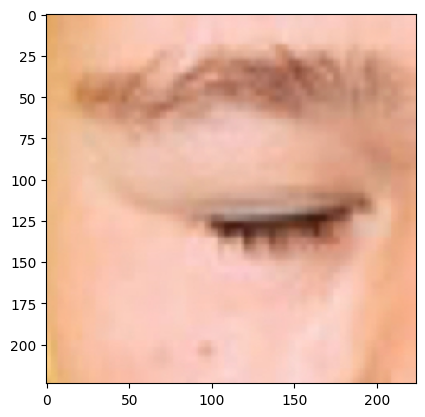

1/1 [==============================] - 0s 267ms/step
29
Predicted Class: Normal
Prediction Confidence: 0.7908355593681335
Image Path testing\normal\IMG_5220.PNG


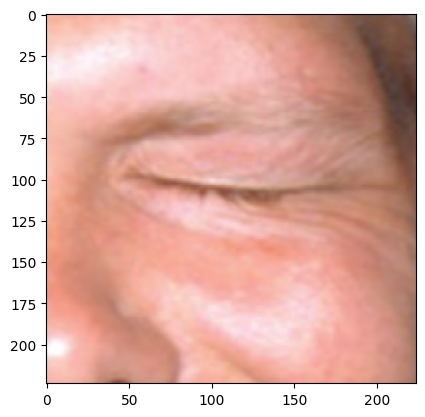

1/1 [==============================] - 0s 250ms/step
30
Predicted Class: Lagophthalmos
Prediction Confidence: 0.13391876220703125
Image Path testing\normal\IMG_5222.PNG


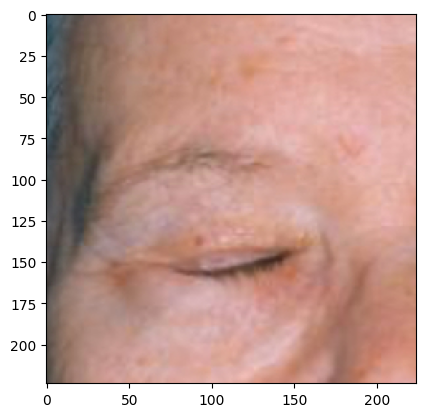

1/1 [==============================] - 0s 263ms/step
31
Predicted Class: Lagophthalmos
Prediction Confidence: 0.0019342491868883371
Image Path testing\normal\IMG_5223.PNG


1/1 [==============================] - 0s 167ms/step
32
Predicted Class: Lagophthalmos
Prediction Confidence: 0.003954167012125254


In [13]:
# Example usage
y_pred = []
results_with_images = {}
for i, f in enumerate(files):
    results_with_images[i] = []
    img_path = f # Path to your image
    print('Image Path' , img_path)
    prediction, img_array = run_inference(model_final, img_path)
    print(i)
    # Interpret the prediction
    if prediction[0][0] < 0.5:
        results_with_images[i].append([img_array, '0'])

        y_pred.extend([0])
        print('Predicted Class: Lagophthalmos')
    else:
        results_with_images[i].append([img_array, '1'])
        y_pred.extend([1])
        print('Predicted Class: Normal')

    print(f'Prediction Confidence: {prediction[0][0]}')

Found 33 images belonging to 2 classes.
y_pred  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0]
y_true  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy: 0.8182
Precision: 0.8601
Recall: 0.8182
F1 Score: 0.8028


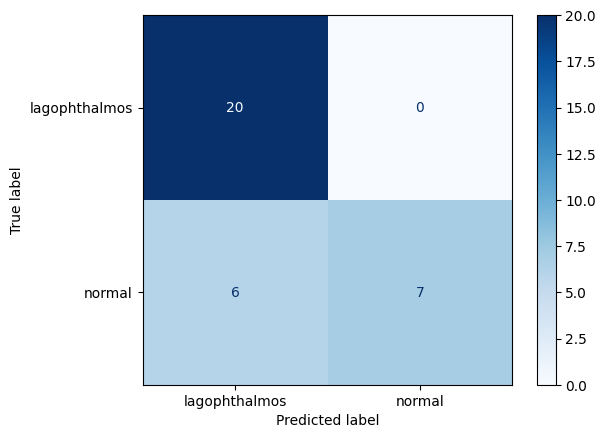

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = model_final
# Load your test data
# Make sure to update the directory, target_size, and other parameters according to your dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'testing',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Get the true labels
y_true = test_generator.classes
print('y_pred ', y_pred)
print('y_true ', y_true)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Compute other metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()


# False Positives 

In [15]:
false_positives = []
false_negatives = []
for i, (true, pred) in enumerate(zip(y_true, y_pred)):
    if true == 0 and pred == 1:
        false_positives.append(i)
    elif true == 1 and pred == 0:
        false_negatives.append(i)

In [16]:
for fp in false_positives:
    print(fp)
    img_array = results_with_images[fp][0][0]
    print('Label: ', label)
    plt.imshow(img_array[0])
    plt.show()

# False Negatives

22
Label:  0


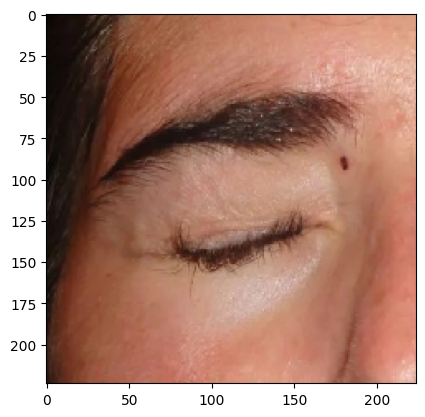

27
Label:  0


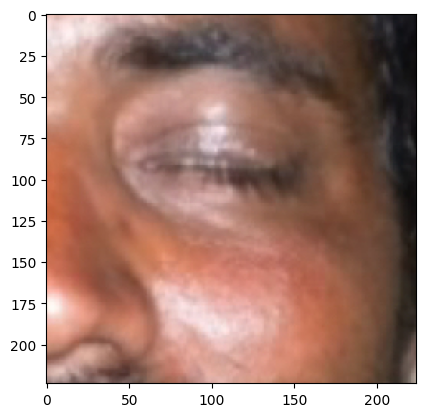

28
Label:  0


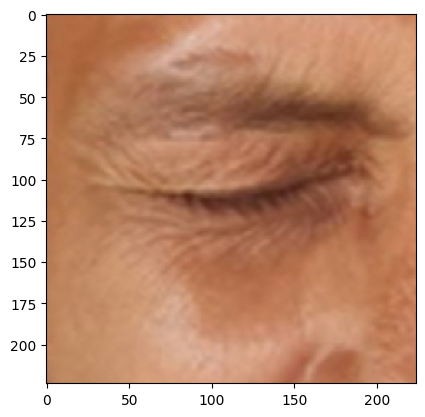

30
Label:  0


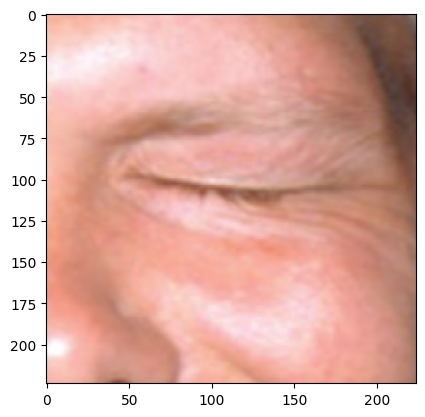

31
Label:  0


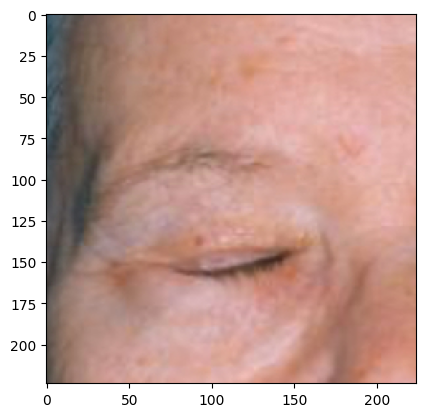

32
Label:  0


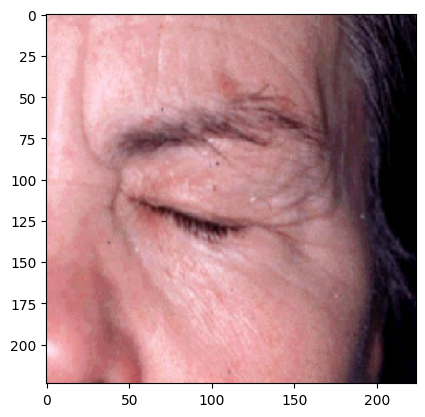

In [17]:
for fn in false_negatives:
    print(fn)
    img_array = results_with_images[fn][0][0]
    label = results_with_images[fn][0][1]
    print('Label: ', label)
    plt.imshow(img_array[0])
    plt.show()